In [1]:
import numpy as np
import pandas as pd

import sklearn
import torch

import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [78]:
df.columns

Index(['Kód projektu', 'Název česky', 'Název anglicky', 'Anotace česky',
       'Anotace anglicky', 'Hlavní CEP obor', 'Vedlejší CEP obor',
       'Další vedlejší CEP obor', 'Hlavní FORD obor', 'Vedlejší FORD obor',
       'Další vedlejší FORD obor', 'Kategorie VaV', 'Hlavní účastníci',
       'Další účastníci', 'Výčet právních forem účastníků',
       'Výčet krajů účastníků', 'Výčet zemí účastníků',
       'Podrobné informace o účastnících', 'Hlavní řešitelé', 'Další řešitelé',
       'Klíčová slova', 'Výčet druhů dosažených výsledků', 'Poskytovatel',
       'Program', 'Uznané náklady', 'Podpora ze SR',
       'Ostatní veřejné zdroje fin.', 'Neveřejné zdroje fin.',
       'Začátek řešení', 'Konec řešení', 'URL v Starfose', 'Relevance'],
      dtype='object')

In [126]:
df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
reduced_df = df[['Poskytovatel', 'Hlavní CEP obor', 'Název anglicky', 'Anotace anglicky', 'Klíčová slova']]

In [127]:
reduced_df.dropna(inplace=True)
reduced_df.reset_index(inplace=True)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
reduced_df.drop(columns='index', inplace=True)

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
@Language.factory('language_detector')
def create_language_detector(nlp, name):
    return LanguageDetector(language_detection_function=None)

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('language_detector', name='language_detector', last=True) 

ValueError: [E004] Can't set up pipeline component: a factory for 'language_detector' already exists. Existing factory: <function create_language_detector at 0x7ff8c5cce950>. New factory: <function create_language_detector at 0x7ff8aca8ac20>

In [129]:
text_english = "This is an English text."
text_german = "Wenn ist das Nunstück git und Slotermeyer? Ja! Beiherhund das Oder die Flipperwaldt gersput!"
text_czech = "Ale, milostpane, pana arcivévodu Ferdinanda, toho z Konopiště, toho tlustýho, nábožnýho."

doc = nlp(text_english)
print(doc._.language)

doc = nlp(text_german)
print(doc._.language)

doc = nlp(text_czech)
print(doc._.language['language'])

nlp(text_czech)._.language['language']

{'language': 'en', 'score': 0.9999956566833494}
{'language': 'de', 'score': 0.9999967393450988}
cs


'cs'

In [130]:
eng_df = reduced_df[~reduced_df['Klíčová slova'].str.contains('ě|š|č|ř|ž|ý|á|í|é|ů|ú|ň|ď|ť')]

In [131]:
eng_df['concat'] = eng_df.iloc[:, 2] + ' ' + eng_df.iloc[:, 3]
eng_df['concat'] = eng_df['concat'].astype(str)
eng_df['concat'] = eng_df['concat'].apply(lambda x: x.lower())

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [132]:
from string import punctuation
import re
eng_df['concat'] = eng_df['concat'].apply(lambda x: re.sub(r"[{}]".format(punctuation), ' ', x))

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
import nltk
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

eng_df['lemmatized'] = eng_df['concat'].apply(lemmatize_text)
eng_df['lemmatized'] = eng_df['lemmatized'].apply(lambda x: ' '.join(x))

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [134]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw.extend(['aim', 'project', 'evaluate', 'research', 'improve', 'improvement', 'development'])

def remove_stopwords(x):
    new_sentence = []
    for word in x.split():
        if word not in sw:
            new_sentence.append(word)
    return ' '.join(new_sentence)

eng_df['lemmatized'].apply(remove_stopwords)

0        neuroactive steroid male reproduction study pa...
1        care patient cystic fibrosis early efficient d...
2        molecular cytogenetic analysis brain tumour ce...
3        modelling potentially antimycobacterial active...
4        application dna microarrays molecular diagnost...
                               ...                        
30983    present technology utilisation renewable resou...
30984    dependancy revenueable source utilization ener...
30985    system utilizing renewable energy source poten...
30986    possibility utilization geothermal source ener...
30987    scientific background data air pollution guant...
Name: lemmatized, Length: 28380, dtype: object

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer()
vectorized = transformer.fit_transform(eng_df['lemmatized'])
vectorized.shape

(28380, 84246)

In [136]:
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 33993 + 1) instead
  after removing the cwd from sys.path.


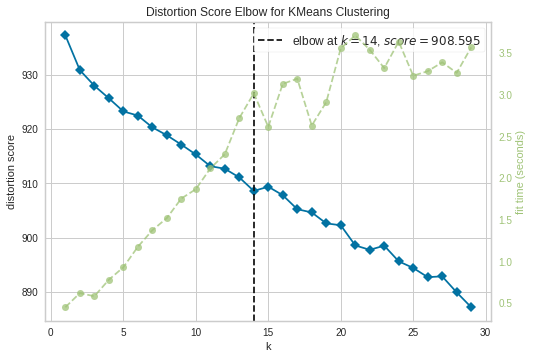

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 30))

sample = vectorized[np.random.random_integers(0, vectorized.shape[0], 1000), :]
visualizer.fit(sample)
visualizer.show()

In [ ]:
# transformer = TfidfVectorizer()
# vectorized = transformer.fit_transform(eng_df['lemmatized'])

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1, 100))

# visualizer.fit(vectorized)
# visualizer.show()

In [17]:
vectorized.shape

(33993, 91092)

In [35]:
from pyclustertend import hopkins ## the hopkins test
sample = vectorized[np.random.random_integers(0, vectorized.shape[0], 50), :]
vectorized_df = pd.DataFrame(sample.toarray())
hopkins(vectorized_df, vectorized_df.shape[0])

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  


0.2522770893397724

Clustering tendency of `0.2522770893397724`. We would need `>0.5` to have any meaningful clusters.

In [36]:
vectorized_df = pd.DataFrame(vectorized.toarray())

# Let's try to vectorize a smaller sample... let's say 1000 randomly selected projects

In [137]:
eng_df['lemmatized']

0        neuroactive steroid in male reproduction the a...
1        improvement of care for patient with cystic fi...
2        molecular cytogenetic analysis of brain tumour...
3        modelling of potentially antimycobacterial act...
4        application of dna microarrays in molecular di...
                               ...                        
30983    the improvement of present technology for util...
30984    dependancy of the revenueable source utilizati...
30985    research and development of system utilizing r...
30986    possibility of the utilization of geothermal s...
30987    research and development of scientific backgro...
Name: lemmatized, Length: 28380, dtype: object

In [138]:
sample = eng_df['lemmatized'].sample(n=1000, random_state=42)
sample.head()

21725    pathogenesis and treatment of radiation pneumo...
12627    novel concept of venturi loop reactor design m...
20371    developmental genetics of amphioxus insight in...
4650     proposal of the methodology and application of...
23170    comprehensive treatment of infectious complica...
Name: lemmatized, dtype: object

In [139]:
transformer = TfidfVectorizer()
vectorized = transformer.fit_transform(sample)
vectorized.shape

(1000, 11884)

In [98]:
from pyclustertend import vat
arr = vectorized.toarray()
hopkins(arr, arr.shape[0])

0.08795574699010084

Again the clustering tendency is too low. We can see that the Elbow doesn't really work here.

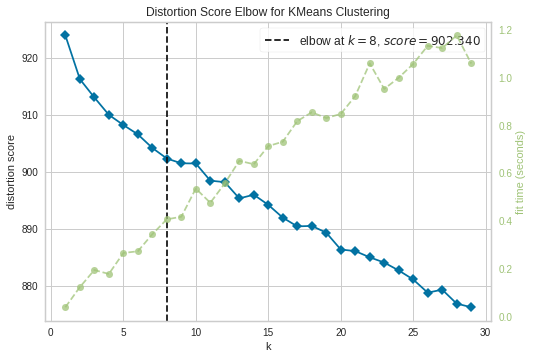

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 30))

visualizer.fit(vectorized)
visualizer.show()

# Let's try to find some communities atleast

In [46]:
!pip install python-igraph

     |████████████████████████████████| 3.2 MB 114 kB/s eta 0:00:01


In [99]:
import igraph as ig

In [140]:
sample_df = eng_df.sample(n=10, random_state=42)
sample_df.reset_index(inplace=True)

In [141]:
vector_df = pd.DataFrame(vectorized.todense())
vector_df = vector_df.agg('mean', axis=1)
sample_df.drop(columns='index', inplace=True)
sample_df

,Poskytovatel,Hlavní CEP obor,Název anglicky,Anotace anglicky,Klíčová slova,concat,lemmatized
0,MO - Ministerstvo obrany,FC - Pneumologie,Pathogenesis and treatment of radiation pneumo...,To contribute to the knowledge of development ...,pathogenesis; treatment; radiation pneumonits;...,pathogenesis and treatment of radiation pneumo...,pathogenesis and treatment of radiation pneumo...
1,GA ČR - Grantová agentura České republiky,CI - Průmyslová chemie a chemické inženýrství,Novel concept of venturi loop reactors design....,Subject of our research in this field is devel...,mass; transfer; gas-liquid; dispersion; ejecto...,novel concept of venturi loop reactors design ...,novel concept of venturi loop reactor design m...
2,"MŠMT - Ministerstvo školství, mládeže a tělový...",EB - Genetika a molekulární biologie,Developmental Genetics of Amphioxus: Insights ...,The purpose of this project is to help in unde...,development; gene; Pax; amphioxus,developmental genetics of amphioxus insights ...,developmental genetics of amphioxus insight in...
3,MZe - Ministerstvo zemědělství,GA - Zemědělská ekonomie,Proposal of the methodology and application of...,The objective of research is development of me...,standard gross margins,proposal of the methodology and application of...,proposal of the methodology and application of...
4,MZ - Ministerstvo zdravotnictví,FI - Traumatologie a ortopedie,Comprehensive treatment of infectious complica...,Modern treatment of fractures of long bones wi...,Devastating Injuries; Infectious Complications...,comprehensive treatment of infectious complica...,comprehensive treatment of infectious complica...
5,"MŠMT - Ministerstvo školství, mládeže a tělový...",CC - Organická chemie,Biomedical investigation of optically pure sil...,Silybin is natural flavonolignan used as nutra...,Silymarin; silybin; silibinin; prostate cancer...,biomedical investigation of optically pure sil...,biomedical investigation of optically pure sil...
6,GA ČR - Grantová agentura České republiky,EF - Botanika,Population processes governing the formation a...,The project aims to answer some critical quest...,polyploid; evolution; hybridization; contact; ...,population processes governing the formation a...,population process governing the formation and...
7,MO - Ministerstvo obrany,KA - Vojenství,ASkD - OA - Mobile shop device for maintenance...,The main aim of project is to develop and veri...,lead acid battery; battery charging; mobile de...,askd oa mobile shop device for maintenance...,askd oa mobile shop device for maintenance and...
8,MD - Ministerstvo dopravy,JO - Pozemní dopravní systémy a zařízení,Application of traffic logistic approaches in ...,In the current stage there is a necessity to e...,public transport; transport quality; urban agg...,application of traffic logistic approaches in ...,application of traffic logistic approach in ur...
9,MŽP - Ministerstvo životního prostředí,DI - Znečištění a kontrola vzduchu,Investigation of the Impact of Road Transport ...,Methodology of emission inventory for the emis...,air pollution; noise pollution; emission inven...,investigation of the impact of road transport ...,investigation of the impact of road transport ...


In [191]:
tuples = [tuple(x) for x in sample_df[['Poskytovatel', 'Hlavní CEP obor']].values]
tuples.extend([tuple(x) for x in sample_df[['Hlavní CEP obor', 'Název anglicky']].values])

g = ig.Graph.TupleList(tuples, directed=True)
tuples

[('MO - Ministerstvo obrany', 'FC - Pneumologie'),
 ('GA ČR - Grantová agentura České republiky',
  'CI - Průmyslová chemie a chemické inženýrství'),
 ('MŠMT - Ministerstvo školství, mládeže a tělovýchovy',
  'EB - Genetika a molekulární biologie'),
 ('MZe - Ministerstvo zemědělství', 'GA - Zemědělská ekonomie'),
 ('MZ - Ministerstvo zdravotnictví', 'FI - Traumatologie a ortopedie'),
 ('MŠMT - Ministerstvo školství, mládeže a tělovýchovy',
  'CC - Organická chemie'),
 ('GA ČR - Grantová agentura České republiky', 'EF - Botanika'),
 ('MO - Ministerstvo obrany', 'KA - Vojenství'),
 ('MD - Ministerstvo dopravy', 'JO - Pozemní dopravní systémy a zařízení'),
 ('MŽP - Ministerstvo životního prostředí',
  'DI - Znečištění a kontrola vzduchu'),
 ('FC - Pneumologie', 'Pathogenesis and treatment of radiation pneumonitis'),
 ('CI - Průmyslová chemie a chemické inženýrství',
  'Novel concept of venturi loop reactors design. Method and fundamental data obtaining.'),
 ('EB - Genetika a molekulární b

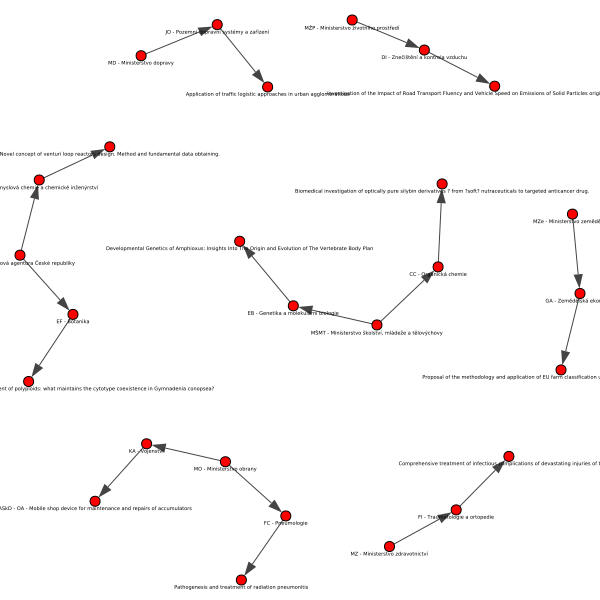

In [208]:
layout = g.layout('kk')
visual_style = {}
visual_style["vertex_size"] = 10
visual_style['layout'] = layout
visual_style['vertex_label'] = g.vs['name']
visual_style['vertex_label_size'] = 5
visual_style["vertex_label_dist"] = 1
ig.plot(g, **visual_style)